# Initial Script for exploring Van Es dataset

# Goals

1. Determine what files we have.
2. Make sure that my understaning of these files tallies with what is reported in the paper.
2. Plot some of the data. 

Import the required libraries.

In [1]:
import nipype
import nilearn
import MRITOOLS

200324-11:10:23,845 nipype.utils INFO:
	 Running nipype version 1.3.2 (latest: 1.4.2)
MRI tool version 1.0
loading nodes
loading workflows
loading utils


/home/nicholas/anaconda2/envs/initenv/lib/python2.7/site-packages/nilearn/__init__.py:73: DeprecationWarning: Python2 support is deprecated and will be removed in the next release. Consider switching to Python 3.6 or 3.7.
  _python_deprecation_warnings()


Define the directories we are going to be working with. First is the anatomical data that Tomas sent.

In [2]:
ANATDIR='/media/nicholas/STORE/Tomasdat/anat_test_08/anat_test_08/bids/sub-001/anat'

Second is the dataset recovered from openneuro. We are only going to look at the first subject.

In [3]:
FUNCDIR='/media/nicholas/STORE/Tomasdat/ds002574-download/sub-01'

In [4]:
import os
sessions=os.listdir(FUNCDIR)
sessions

['ses-01', 'ses-03', 'ses-02']

This subject completed 3 sessions

In [5]:
scantypes=os.listdir(os.path.join(FUNCDIR,sessions[0]))
scantypes

['func', 'anat', 'fmap']

Per session, there are functional scans, anatomical scans and presumably fieldmap scans

Im only really intersted in the functional data for now. I want to know how many runs there are

In [6]:
from MRITOOLS.Utils import findniftis

niftis=list()
for sess in sessions:
    niftis.append(findniftis(os.path.join(FUNCDIR,sess,'func'),'.nii.gz'))

Found 12 nifti filesFound 14 nifti filesFound 11 nifti files

There seems to be a large number of runs per session (12, 11,14). This tallies with what is reported in the paper - 37 runs for S1. I want to know some of the properties of these scans. 

In [7]:
import MRITOOLS
from MRITOOLS.Utils import getinfolist

In [8]:
getinfolist(niftis[0])

,VoxsizeX,VoxsizeY,VoxsizeZ,ShapeX,ShapeY,ShapeZ,Volumes,TR,FILE
0,1.5625,1.5625,1.6,128,128,50,120,1.5,sub-01_ses-01_task-prf_run-01_bold.nii.gz
0,1.5625,1.5625,1.6,128,128,50,120,1.5,sub-01_ses-01_task-prf_run-02_bold.nii.gz
0,1.5625,1.5625,1.6,128,128,50,120,1.5,sub-01_ses-01_task-prf_run-03_bold.nii.gz
0,1.5625,1.5625,1.6,128,128,50,120,1.5,sub-01_ses-01_task-prf_run-04_bold.nii.gz
0,1.5625,1.5625,1.6,128,128,50,120,1.5,sub-01_ses-01_task-prf_run-05_bold.nii.gz
0,1.5625,1.5625,1.6,128,128,50,120,1.5,sub-01_ses-01_task-prf_run-06_bold.nii.gz
0,1.5625,1.5625,1.6,128,128,50,120,1.5,sub-01_ses-01_task-prf_run-07_bold.nii.gz
0,1.5625,1.5625,1.6,128,128,50,120,1.5,sub-01_ses-01_task-prf_run-08_bold.nii.gz
0,1.5625,1.5625,1.6,128,128,50,120,1.5,sub-01_ses-01_task-prf_run-09_bold.nii.gz
0,1.5625,1.5625,1.6,128,128,50,120,1.5,sub-01_ses-01_task-prf_run-10_bold.nii.gz


The main discrepancy I can see is that the voxel size doesn't seem match what is reported in the paper (2 mm). May have to check that I am reading from the correct part of the nifti header.

The TR matches what is reported in the paper. 

Each run has 120 volumes, which is conistent with what is reported in the paper. The z dimension seems a lot smaller than the X and Y dimensions. This makes sense as we are focused on a structure at the 'back' of the brain.

Plot a volume to make sure that I have understood this correctly.

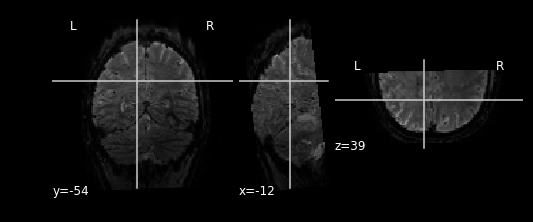

4

In [11]:
from MRITOOLS.Utils import bplot

bplot(niftis[0][0])

This seems to be correct. Now I want to check what is stored in the anatomical dataset. 

In [13]:
ANATS=findniftis(ANATDIR,'.nii.gz')

getinfolist(ANATS)

Found 9 nifti files

,VoxsizeX,VoxsizeY,VoxsizeZ,ShapeX,ShapeY,ShapeZ,TR,FILE
0,0.800008,0.8,0.8,312,320,320,2.5000,sub-001_ses-1_acq-DRIVE.GMPSF.BB_T2w.nii.gz
0,0.800008,0.8,0.8,312,320,320,2.5000,sub-001_ses-1_acq-DRIVE_T2w.nii.gz
0,0.800008,0.8,0.8,312,320,320,2.5000,sub-001_ses-1_acq-standard_T2w.nii.gz
0,0.800008,0.8,0.8,312,320,320,0.0099,sub-001_ses-1_run-1_T1w.nii.gz
0,0.800008,0.8,0.8,312,320,320,0.0099,sub-001_ses-1_run-2_T1w.nii.gz
0,0.800008,0.8,0.8,312,320,320,0.0099,sub-001_ses-1_run-3_T1w.nii.gz
0,0.800008,0.8,0.8,312,320,320,0.0099,sub-001_ses-1_run-4_T1w.nii.gz
0,0.800008,0.8,0.8,312,320,320,0.0099,sub-001_ses-1_run-5_T1w.nii.gz
0,0.800008,0.8,0.8,312,320,320,0.0099,sub-001_ses-1_run-6_T1w.nii.gz


The suffixes indicate that we have a bunch of T1 and T2 weighted images

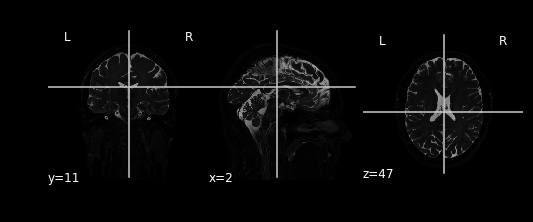

3

In [14]:
bplot(ANATS[0])

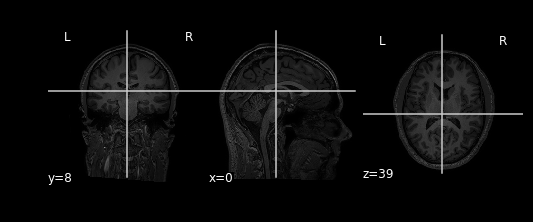

3

In [15]:
bplot(ANATS[3])

I guess I'm not sure I understand how meaningful the number of these images are. There are a bunch of T1 images that seem to be associated with different experimental runs (1-6). But this is less than the number of functional runs that we have (12, for session 1).  